In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Download Kepler Light Curve**

In [1]:
!pip install lightkurve --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 31.7 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=c52ad405b3e4eca989d3ba2451e6f627247ce3a53104bbca7587ba95a265cbc3
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=57dd35e311367f45b0ebd33fb35f9932dbcca93dea504937a7b75334135116e9
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b55

In [2]:
import lightkurve as lk

In [3]:
# .py code help to run the code in screen mode .ipynb cannot do that
# This code can be used to load light curve training dataset and do the
# preprocessing like vertical scaling and extending the light curve
# CNN Model is defined
# Training, learning rate scheduler and early stopping feature included

## -- IMP: Check whether the file name to save the model is complete ##

# Import TF and check for GPU

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print("TensorFlow version:", tf.__version__)

# Import required libraries

import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import save_model, load_model
import math
from sklearn.model_selection import train_test_split
import sys
from numpy import array,append,arange,zeros,exp,sin,random,std
from scipy.interpolate import interp1d

import time


[]
TensorFlow version: 2.15.0


In [4]:
model_load = load_model("/content/drive/MyDrive/5_AstroFYP_data/april_25_model_training/ml_model/april24_2024_model_unfDist_LDC_size_horz_scale.h5")


In [5]:
KIC_ID = "KIC9166862"
Kepler_name = "Kepler-731b"
# Period = 3.235
print(KIC_ID+'_'+Kepler_name)

KIC9166862_Kepler-731b


In [6]:
search_result = lk.search_lightcurve(
    KIC_ID
)
print(search_result)

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr009166862      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr009166862      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr009166862      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr009166862      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr009166862      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr009166862      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr009166862      0.0
  7 Kepler Quarter 10 2011 Kepler    1800 kplr009166862      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr009166862      0.0
  9 Kepler Quarter 08 2011 Kepler    1800 kplr009166862      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr009166862      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr0

In [7]:
search_result = lk.search_lightcurve(
    KIC_ID, mission='Kepler'
)
print(search_result)

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr009166862      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr009166862      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr009166862      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr009166862      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr009166862      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr009166862      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr009166862      0.0
  7 Kepler Quarter 10 2011 Kepler    1800 kplr009166862      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr009166862      0.0
  9 Kepler Quarter 08 2011 Kepler    1800 kplr009166862      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr009166862      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr0

In [8]:
search_result = lk.search_lightcurve(
    KIC_ID, mission='Kepler', exptime=1800
)
print(search_result)

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr009166862      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr009166862      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr009166862      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr009166862      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr009166862      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr009166862      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr009166862      0.0
  7 Kepler Quarter 10 2011 Kepler    1800 kplr009166862      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr009166862      0.0
  9 Kepler Quarter 08 2011 Kepler    1800 kplr009166862      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr009166862      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr0

In [9]:
print("KIC_ID =", KIC_ID)
lc = lk.search_lightcurve(
    KIC_ID, mission='Kepler', exptime=1800
).download_all()

KIC_ID = KIC9166862


lc_raw.flux.shape = (65031,)


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

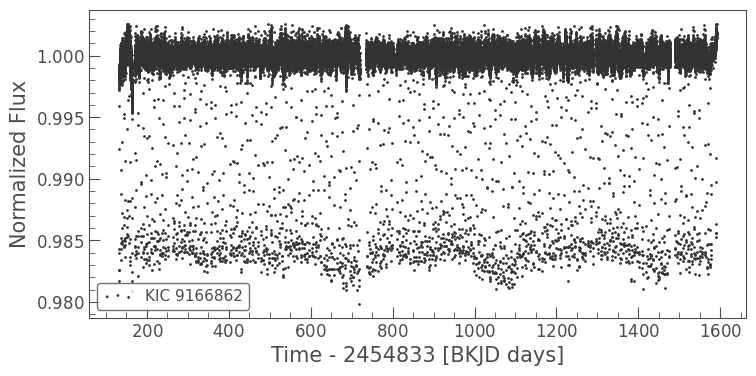

In [10]:
lc_raw = lc.stitch()
print("lc_raw.flux.shape =", lc_raw.flux.shape)

lc_clean = lc_raw.remove_outliers(sigma=10, sigma_upper=1)
lc_clean.scatter()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

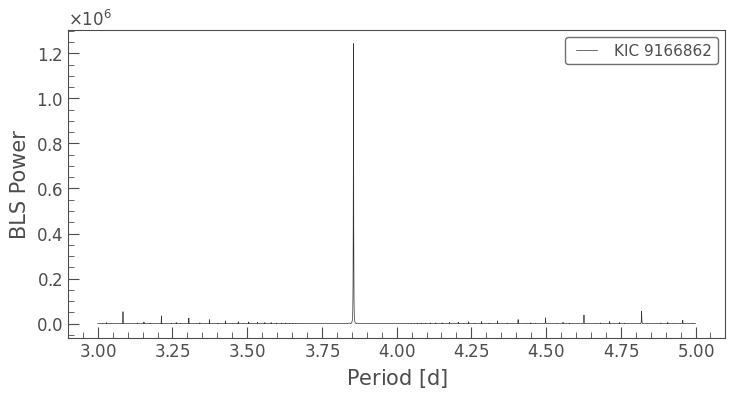

In [11]:
period = np.linspace(3, 5, 10000)
# period = np.linspace(2, 4, 10000)

bls = lc_clean.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()


In [12]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
print("planet_b_period =", planet_b_period)
print("planet_b_t0 =", planet_b_t0)
print("planet_b_dur =", planet_b_dur)




planet_b_period = 3.8556855685568556 d
planet_b_t0 = 132.1069288128044
planet_b_dur = 0.1 d


In [13]:
temp_fold = lc_clean.fold(planet_b_period, epoch_time=planet_b_t0)
fractional_duration = (planet_b_dur / 24.0) / planet_b_period
phase_mask = np.abs(temp_fold.phase.value) < (fractional_duration * 1.5)
transit_mask = np.in1d(lc_clean.time.value, temp_fold.time_original.value[phase_mask])

lc_flat, trend_lc = lc_clean.flatten(return_trend=True, mask=transit_mask)

lc_fold = lc_flat.fold(planet_b_period, epoch_time=planet_b_t0)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

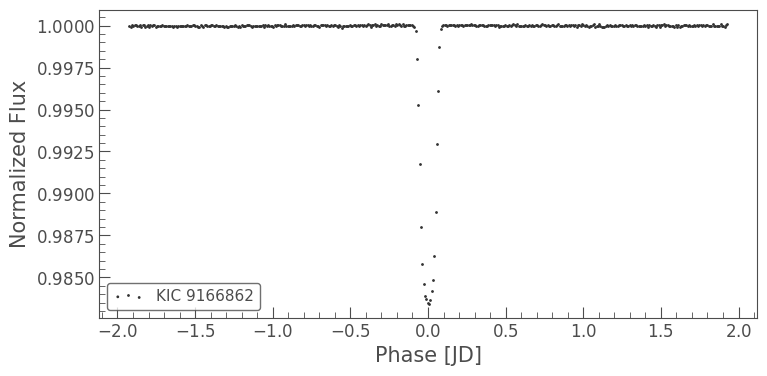

In [14]:
lc_global = lc_fold.bin(time_bin_size=0.0085).normalize()
lc_global.scatter()

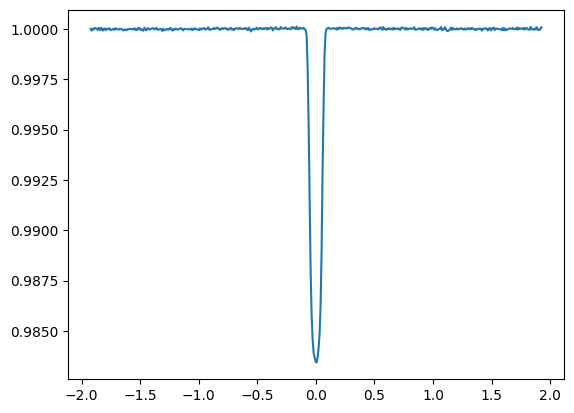

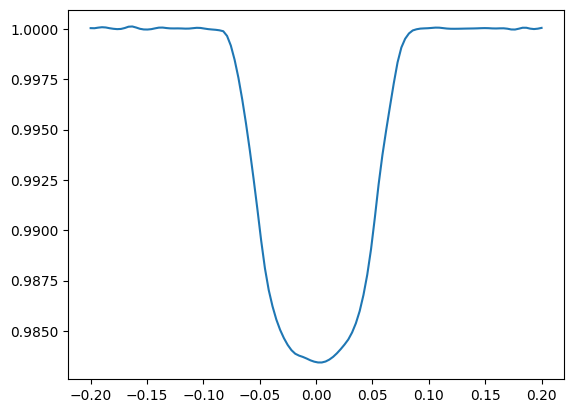

In [15]:
# Interpolate and save the light curve uniformly spaced
original_time = np.array(lc_global.time.value)
original_flux = np.array(lc_global.flux)

plt.plot(original_time, original_flux)
plt.show()

f = interp1d(original_time, original_flux, kind='quadratic')

new_time = np.linspace(-0.2, 0.2, 120)
new_flux = f(new_time)

plt.plot(new_time, new_flux)
plt.show()

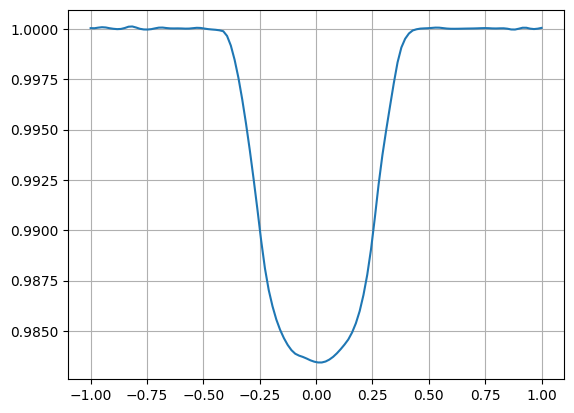

In [16]:
# Save the light curve flux as .npy
lc_save_link = "/content/drive/MyDrive/5_AstroFYP_data/lightkurve_kepler_lc/"+KIC_ID+"_April26_2024_v1.npy"
np.save(lc_save_link, new_flux)

lc_dict_read = np.load(lc_save_link)

plt.grid("on")
plt.plot(np.linspace(-1,1,len(lc_dict_read)), lc_dict_read)
plt.show()

del lc_dict_read

**Predict Kepler LC**

In [17]:
# 1. Load Lightcurve Dataset
lc_dir = lc_save_link
test_lc = np.load(lc_dir)
print("test_lc.shape = ", test_lc.shape)

test_lc = np.reshape(test_lc, newshape=(1,120))
print("test_lc.shape = ", test_lc.shape)

# Don't run if data is already normalized
# Normalize the lightcurves
## - Test Set
test_lc_scaled = np.zeros(test_lc.shape)
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled[i] = (test_lc[i] - np.amin(test_lc[i]))/(np.amax(test_lc[i]) - np.amin(test_lc[i]))

test_lc.shape =  (120,)
test_lc.shape =  (1, 120)


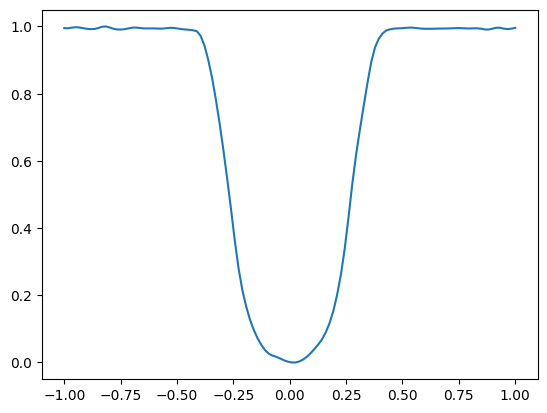

In [18]:
plt.plot(np.linspace(-1,1,len(test_lc_scaled[0])), test_lc_scaled[0])
plt.show()

In [19]:
# Append with ones (if required only.
# eg APPENING not required for BATMAN lightcurve since we already append BATMAN
# while saving it as csv file and npy file)
## - Test Set
test_lc_scaled_append = np.ones((test_lc.shape[0],150))
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled_append[i,15:135] = test_lc_scaled[i]
print("Extended the light curves")

# del test_lc
# del test_lc_scaled

Extended the light curves


In [20]:
# 5. Horizontal scaling
def scale_horizontally(input_lc_dataset):
    # lc_np_array_offset_mask used to select the flat part by certain percentage
    input_lc_dataset_mask = np.copy(input_lc_dataset)

    for iteration in np.arange(len(input_lc_dataset)):
        input_lc_dataset_mask[iteration][(input_lc_dataset[iteration]>=0.98)] = 1.0
        input_lc_dataset_mask[iteration][(input_lc_dataset[iteration]<0.98)] = 0.0

    print("Length of one LC = ", len(input_lc_dataset_mask[0]))

    count_zeros_array = np.zeros((len(input_lc_dataset_mask),))
    for iteration in np.arange(len(input_lc_dataset_mask)):
        # Calculate the number of occurrences of '0'
        count_zeros = np.count_nonzero(input_lc_dataset_mask[iteration] == 0)
        count_zeros_array[iteration] = count_zeros

    # Interpolate the light curve
    input_lc_dataset_interpol = np.zeros((len(input_lc_dataset), 120))
    len_selected_portion = np.zeros(len(input_lc_dataset))
    print("input_lc_dataset_interpol.shape =", input_lc_dataset_interpol.shape)

    center_index = int(len(input_lc_dataset[0])/2)
    print("center_index =", center_index)

    for iteration in np.arange(len(input_lc_dataset_interpol)):

        left_index = int(center_index - int(count_zeros_array[iteration]/2) - int(count_zeros_array[iteration]/6))
        right_index = int(center_index + int(count_zeros_array[iteration]/2) + int(count_zeros_array[iteration]/6))
        selected_portion = input_lc_dataset[iteration][left_index:right_index]
        print("left_index =", left_index)
        print("right_index =", right_index)
        print("Length =", right_index-left_index+1)

        # Calculate the length of the selected region
        len_selected_portion[iteration] = len(selected_portion)

        # Interpolate the selected portion
        # Original data
        original_x = np.linspace(-1, 1, num=len(selected_portion))
        original_y = selected_portion

        # Create a quadratic interpolation function
        f = interp1d(original_x, original_y, kind='quadratic')

        # Define the range of x-values for the interpolation with 120 elements
        x_interpolation = np.linspace(-1, 1, num=120)

        # Perform the interpolation
        y_interpolated = f(x_interpolation)

        # # Replacing end elements with 1

        # y_interpolated[0:9] = np.ones(len(y_interpolated[0:9]))
        # # print(f"len(y_interpolated[0:9])) = {len(y_interpolated[0:9])}")

        # y_interpolated[111:120] = np.ones(len(y_interpolated[111:120]))
        # # print(f"len(y_interpolated[111:120])) = {len(y_interpolated[111:120])}")

        input_lc_dataset_interpol[iteration] = y_interpolated

    return input_lc_dataset_interpol

test_lc_horiz_scaled = scale_horizontally(test_lc_scaled_append)
# del test_lc_scaled_append

processed_test_lc = test_lc_horiz_scaled
# del test_lc_horiz_scaled


Length of one LC =  150
input_lc_dataset_interpol.shape = (1, 120)
center_index = 75
left_index = 43
right_index = 107
Length = 65


In [21]:
# Test on the ML model - Test Dataset - Original Simulated light curve
# (i.e. without sampling and interpolation)
# Test dataset - Prediciton
# processed_test_lc = np.zeros(shape=(1,120))
test_predict_shape = model_load.predict(processed_test_lc) # model_load.predict(test_lc_scaled) #
test_predict_shape_normalized = np.zeros(test_predict_shape.shape)
for i in np.arange(len(test_predict_shape)):
    test_predict_shape_normalized[i] = (test_predict_shape[i] - np.amin(test_predict_shape[i]))/(np.amax(test_predict_shape[i]) - np.amin(test_predict_shape[i]))
print("Normalized the predicted shape")
test_predict_shape = test_predict_shape_normalized
del test_predict_shape_normalized

1/1 [==============================] - 1s 585ms/step
Normalized the predicted shape


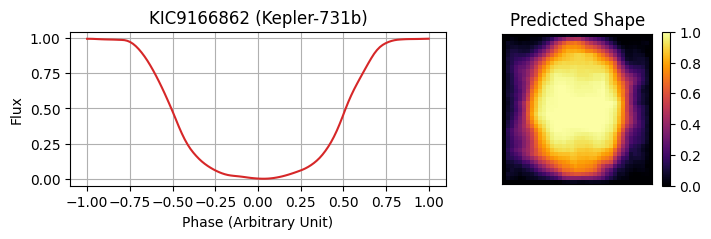

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(8,2),gridspec_kw={'width_ratios': [2,1]})  # 1 row, 2 columns
ph = np.linspace(-1,1,len(processed_test_lc[0]))

# Plot on each subplot
k = int(0) # Index
axes[0].set_title(f"{KIC_ID} ({Kepler_name})")
axes[0].plot(ph, processed_test_lc[k], color='tab:red')
axes[0].grid('on')
axes[0].set_ylabel('Flux')
axes[0].set_xlabel('Phase (Arbitrary Unit)')


axes[1].set_title('Predicted Shape')
axes[1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[1].imshow(test_predict_shape[k],cmap='inferno')
plt.colorbar(img)
plt.savefig("/content/drive/MyDrive/5_AstroFYP_data/lightkurve_kepler_lc/"+KIC_ID+"_April26_v1.png")
plt.show()
